## 0. EDA

> The RT-IoT2022, a proprietary dataset derived from a **real-time IoT infrastructure**, is introduced as a comprehensive resource integrating a diverse range of IoT devices and **sophisticated network attack methodologies**. This dataset encompasses both **normal** and **adversarial** network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a **detailed perspective on the complex nature of network traffic**. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks.


Class Labels

The Dataset contains both Attack patterns and Normal Patterns. 

Attacks patterns Details: 
1.	DOS_SYN_Hping------------------------94659
2.	ARP_poisioning--------------------------7750
3.	NMAP_UDP_SCAN--------------------2590
4.	NMAP_XMAS_TREE_SCAN--------2010
5.	NMAP_OS_DETECTION-------------2000
6.	NMAP_TCP_scan-----------------------1002
7.	DDOS_Slowloris------------------------534
8.	Metasploit_Brute_Force_SSH---------37
9.	NMAP_FIN_SCAN---------------------28

<br>

Normal Patterns Details:

1.	MQTT -----------------------------------8108
2.	Thing_speak-----------------------------4146
3.	Wipro_bulb_Dataset-------------------253 
4. Amazon-Alexa -----------------------86842 (Amazon Alexa is missing in the current dataset)

In [149]:
# # 한글 폰트 출력 관련 (필요시 주석 해제 후 사용)
# import matplotlib
# print(matplotlib.get_data_path())

In [168]:
# 폰트 설정 (https://github.com/Basic-Track-Team5/term-project/issues/2 폰트 설치가 되지 않았다면 먼저 진행)
import matplotlib.pyplot as plt

plt.rc('font', family=['NanumGothic', 'DejaVu Sans'])

### 0.1. Dataset Overview

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 로드
df = pd.read_csv('RT_IoT2022.csv')

df.head(3)

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish


In [170]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [171]:
# 결측치 확인 -> 결측치 없음
df.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [172]:
# 데이터 통계 정보 확인
df.describe()

,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


### 0.2. target 변수 확인

In [173]:
# target variable ('Attack_type') 분포 확인
df['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [174]:
# 정상 트래픽으로 간주할 원본 label 목록 정의
normal_labels = ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb'] # Amazon Alexa is missing in the current dataset
df['Attack_type'] = df['Attack_type'].apply(lambda x: 'Normal' if x in normal_labels else x)
df['Attack_type'].head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Attack_type, dtype: object

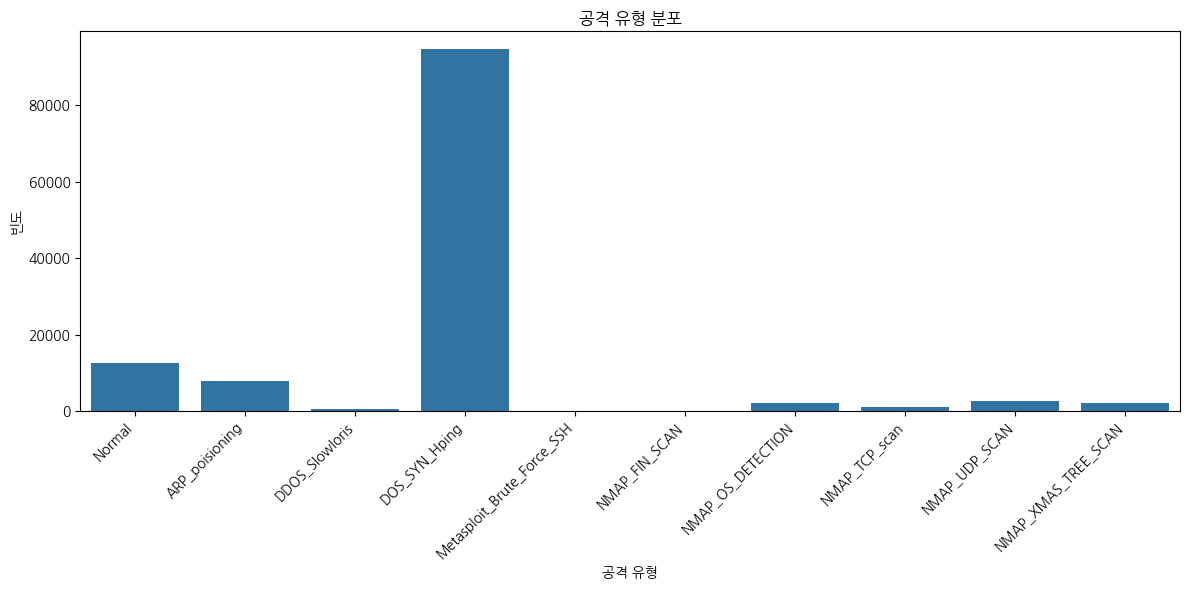

In [175]:
# target variable ('Attack_type') distribution visualization
# TODO: `Normal` 클래스가 적어(약 10%) 나중에 불균형 문제를 해결해야 함!
plt.figure(figsize=(12, 6))
sns.countplot(x='Attack_type', data=df)
plt.title('공격 유형 분포')
plt.xlabel('공격 유형')
plt.ylabel('빈도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 0.3. 숫자형(numerical)/범주형(categorical) Column 분리

In [176]:
# Feature 중 숫자형/범주형 컬럼 분리 (Attack_type 제외)
numeric_features_org = df.select_dtypes(include=np.number).columns.tolist()
categorical_features_org = df.select_dtypes(include='object').columns.tolist()
if 'Attack_type' in categorical_features_org:
    categorical_features_org.remove('Attack_type') # target variable 제외

print(f'Number of numeric features: {len(numeric_features_org)} e.g. {numeric_features_org[:3]}')
print(f'Number of categorical features: {len(categorical_features_org)} e.g. {categorical_features_org[:3]}')
print(f'Total number of features: {len(numeric_features_org) + len(categorical_features_org)}')


Number of numeric features: 82 e.g. ['Unnamed: 0', 'id.orig_p', 'id.resp_p']
Number of categorical features: 2 e.g. ['proto', 'service']
Total number of features: 84


### 0.4. 범주형 자료 확인

In [177]:
for col in categorical_features_org:
    print(f"Column명: {col} \nColumn값 개수: {len(df[col].value_counts())}")
    print(df[col].value_counts())
    print("\n")


Column명: proto 
Column값 개수: 3
proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64


Column명: service 
Column값 개수: 10
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64




## 1. Preprocessing

### 1.1. 불필요한 Column 제거

In [178]:
# 불필요한 Column 제거
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Removed 'Unnamed: 0' column.")

Removed 'Unnamed: 0' column.


### 1.2. target 변수 Encoding (이진 분류, 다중 분류)

In [179]:
from sklearn.preprocessing import LabelEncoder

# 이진 분류(Binary Classification)용 label 생성
df['Binary_Attack_type'] = df['Attack_type'].apply(lambda x: 'Normal' if x == 'Normal' else 'Attack')

# --- 이진 분류용 인코딩 ---
binary_label_encoder = LabelEncoder()
df['Binary_Attack_type_Encoded'] = binary_label_encoder.fit_transform(df['Binary_Attack_type'])

# 이진 분류 인코딩 결과의 클래스 확인
print("Classes for Binary Encoding:", binary_label_encoder.classes_)

Classes for Binary Encoding: ['Attack' 'Normal']


In [180]:
# --- 다중 클래스 분류용 인코딩 ---
multi_class_label_encoder = LabelEncoder()
df['Attack_type_Encoded'] = multi_class_label_encoder.fit_transform(df['Attack_type'])

# 다중 클래스 인코딩 결과의 클래스 확인
print("Classes for Multi-Class Encoding:", multi_class_label_encoder.classes_)

Classes for Multi-Class Encoding: ['ARP_poisioning' 'DDOS_Slowloris' 'DOS_SYN_Hping'
 'Metasploit_Brute_Force_SSH' 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION'
 'NMAP_TCP_scan' 'NMAP_UDP_SCAN' 'NMAP_XMAS_TREE_SCAN' 'Normal']


### 1.3. 범주형 자료(Categorical Feature) - One-Hot Encoding

In [181]:
# 범주형 자료 One-Hot Encoding
df.proto.head(3)
df = pd.get_dummies(df, columns=categorical_features_org, drop_first=True)
df.head(3)

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl
0,38667,1883,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,False,False,False,False,False,True,False,False,False,False
1,51143,1883,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,False,False,False,False,False,True,False,False,False,False
2,44761,1883,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,False,False,False,False,False,True,False,False,False,False


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 96 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id.orig_p                   123117 non-null  int64  
 1   id.resp_p                   123117 non-null  int64  
 2   flow_duration               123117 non-null  float64
 3   fwd_pkts_tot                123117 non-null  int64  
 4   bwd_pkts_tot                123117 non-null  int64  
 5   fwd_data_pkts_tot           123117 non-null  int64  
 6   bwd_data_pkts_tot           123117 non-null  int64  
 7   fwd_pkts_per_sec            123117 non-null  float64
 8   bwd_pkts_per_sec            123117 non-null  float64
 9   flow_pkts_per_sec           123117 non-null  float64
 10  down_up_ratio               123117 non-null  float64
 11  fwd_header_size_tot         123117 non-null  int64  
 12  fwd_header_size_min         123117 non-null  int64  
 13  fwd_header_siz

### 1.4. 숫자형 자료(Numerical Feature) - StandardScaler

In [187]:
from sklearn.preprocessing import StandardScaler

feature_cols = df.columns.tolist()
exclude_cols_for_scaling = ['Attack_type', 'Binary_Attack_type', 'Attack_type_Encoded', 'Binary_Attack_type_Encoded']
feature_cols = [col for col in feature_cols if col not in exclude_cols_for_scaling]

# Feature 데이터 선택
X = df[feature_cols] # Feature 데이터(target 변수를 제외한 나머지)
y_binary = df['Binary_Attack_type_Encoded'] # 이진 분류 target
y_multi = df['Attack_type_Encoded'] # 다중 분류 target

print("Features before scaling:")
print(X.head())

Features before scaling:
   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...  proto_udp  service_dhcp  service_dns  service_http  

In [ ]:
# StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

print("Features after scaling (StandardScaler):")
X_scaled.head(3)

Features after scaling (StandardScaler):


,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl
0,0.211202,0.165266,0.216931,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,-0.015082,-0.148688
1,0.865405,0.165266,0.215946,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,-0.015082,-0.148688
2,0.530753,0.165266,0.217796,0.301353,0.0936,0.07786,0.067497,-0.94887,-0.948656,-0.948767,...,-0.338145,-0.020156,-0.293313,-0.170148,-0.018692,5.366189,-0.031365,-0.004031,-0.015082,-0.148688


In [184]:
X_scaled.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl
count,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05
mean,2.031491e-17,-7.387239e-18,-3.823473e-18,-3.113606e-17,4.184178e-18,5.713568e-18,2.236371e-18,7.139074e-17,-1.625193e-16,1.018631e-16,...,8.933942e-17,1.092936e-17,-8.910857e-17,-4.155322e-17,-1.437049e-17,1.252368e-17,4.761306e-19,-1.118186e-18,6.341194e-18,5.194152e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.816375e+00,-1.929675e-01,-2.930325e-02,-1.015749e-01,-5.783205e-02,-7.492792e-02,-2.539992e-02,-9.488712e-01,-9.486569e-01,-9.487673e-01,...,-3.381455e-01,-2.015646e-02,-2.933131e-01,-1.701481e-01,-1.869180e-02,-1.863520e-01,-3.136514e-02,-4.030505e-03,-1.508236e-02,-1.486877e-01
25%,-8.881372e-01,-1.889724e-01,-2.930324e-02,-5.680510e-02,-2.754570e-02,-2.399876e-02,-2.539992e-02,-9.486702e-01,-9.484603e-01,-9.485663e-01,...,-3.381455e-01,-2.015646e-02,-2.933131e-01,-1.701481e-01,-1.869180e-02,-1.863520e-01,-3.136514e-02,-4.030505e-03,-1.508236e-02,-1.486877e-01
50%,1.353785e-01,-1.889724e-01,-2.930322e-02,-5.680510e-02,-2.754570e-02,-2.399876e-02,-2.539992e-02,-2.834225e-01,-2.832745e-01,-2.833495e-01,...,-3.381455e-01,-2.015646e-02,-2.933131e-01,-1.701481e-01,-1.869180e-02,-1.863520e-01,-3.136514e-02,-4.030505e-03,-1.508236e-02,-1.486877e-01
75%,8.563858e-01,-1.889724e-01,-2.930321e-02,-5.680510e-02,-2.754570e-02,-2.399876e-02,-2.539992e-02,4.652074e-01,4.652806e-01,4.652456e-01,...,-3.381455e-01,-2.015646e-02,-2.933131e-01,-1.701481e-01,-1.869180e-02,-1.863520e-01,-3.136514e-02,-4.030505e-03,-1.508236e-02,-1.486877e-01
max,1.620077e+00,1.224703e+01,1.671055e+02,1.944233e+02,3.061977e+02,2.212123e+02,3.128828e+02,1.879286e+00,1.879218e+00,1.879259e+00,...,2.957307e+00,4.961189e+01,3.409326e+00,5.877232e+00,5.349940e+01,5.366189e+00,3.188253e+01,2.481078e+02,6.630261e+01,6.725507e+00
